## **Cross validation for the icesat, icesat-2, cryosat-2 and aster dem data**

In [2]:
import h5py
import random
import os
import pickle
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from utils.imgShow import imgShow
from utils.geotif_io import readTiff


In [3]:
path_isat1_dem = 'data/cross-val-data/isat1_dem.pkl'
path_isat2_dem = 'data/cross-val-data/isat2_dem.pkl'
path_cryo2_dem = 'data/cross-val-data/cryo2_dem.pkl'


### **1. results correlation among the isat1, isat2, cryo2, and dem**

In [4]:
with open(path_isat1_dem, 'rb') as f:
     isat1_dem = pickle.load(f)
with open(path_isat2_dem, 'rb') as f:
     isat2_dem = pickle.load(f)
with open(path_cryo2_dem, 'rb') as f:
     cryo2_dem = pickle.load(f)


### 1.1 stable region (h-srtm) -> dem, isat1, isat2.

In [5]:
## stable region
ids_isat1_stable = np.where(isat1_dem['type_fp']==1)[0]
ids_isat2_stable = np.where(isat2_dem['type_fp']==1)[0]
print(len(ids_isat1_stable), len(ids_isat2_stable))


1125 187111


Text(0.5, 1.0, 'dem-srtm: mean is 2.59, std is 23.61 \n isat1-srtm: mean is 1.51, std is 16.60 \n isat2-srtm: mean is -2.02, std is 20.64')

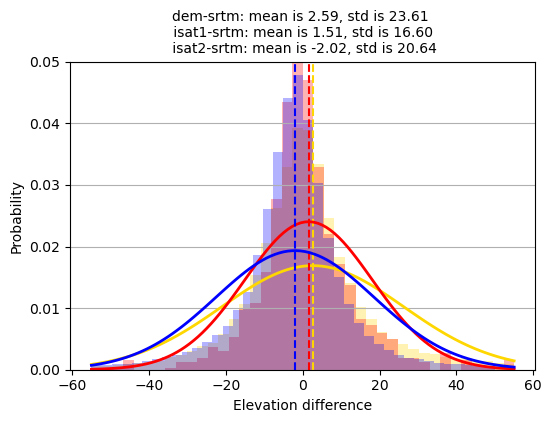

In [22]:
dif_isat1_srtm_stable = isat1_dem['h'][ids_isat1_stable] - isat1_dem['srtm_dem'][ids_isat1_stable]
dif_isat2_srtm_stable = isat2_dem['h'][ids_isat2_stable] - isat2_dem['srtm_dem'][ids_isat2_stable]
dif_dem_srtm_stable_1 = isat1_dem['dem_fp'][ids_isat1_stable] - isat1_dem['srtm_dem'][ids_isat1_stable]
dif_dem_srtm_stable_2 = isat2_dem['dem_fp'][ids_isat2_stable] - isat2_dem['srtm_dem'][ids_isat2_stable]
dif_dem_srtm_stable = np.concatenate((dif_dem_srtm_stable_1, dif_dem_srtm_stable_2), axis=0)

x_range = [-55, 55]

fig, ax = plt.subplots(1,1,figsize=(6, 4))

### dem-srtm
ax.hist(dif_dem_srtm_stable, bins=40, range=x_range, \
                        alpha=0.3, rwidth=0.85, density=True, color='Gold', histtype='stepfilled' )
mu_dem_srtm, std_dem_srtm = norm.fit(dif_dem_srtm_stable) 
x = np.linspace(x_range[0], x_range[1], 100); 
p = norm.pdf(x, mu_dem_srtm, std_dem_srtm)
ax.plot(x, p, 'Gold', linewidth=2)
ax.vlines(x=mu_dem_srtm, ymin=0, ymax=0.05, colors='Gold', linestyles='dashed')


### isat1-srtm
ax.hist(dif_isat1_srtm_stable, bins=40, range=x_range, \
                        alpha=0.3, rwidth=0.85, density=True, color='red', histtype='stepfilled')
mu_isat1_srtm, std_isat1_srtm = norm.fit(dif_isat1_srtm_stable) 
x = np.linspace(x_range[0], x_range[1], 100); 
p = norm.pdf(x, mu_isat1_srtm, std_isat1_srtm)
ax.plot(x, p, 'red', linewidth=2)
ax.vlines(x=mu_isat1_srtm, ymin=0, ymax=0.05, colors='red', linestyles='dashed')


### isat2-srtm
ax.hist(dif_isat2_srtm_stable, bins=40, range=[-55,50], \
                        alpha=0.3, rwidth=0.85, density=True, color='blue', histtype='stepfilled')
mu_isat2_srtm, std_isat2_srtm = norm.fit(dif_isat2_srtm_stable) 
x = np.linspace(x_range[0], x_range[1], 100)
p = norm.pdf(x, mu_isat2_srtm, std_isat2_srtm)
ax.plot(x, p, 'blue', linewidth=2)
ax.vlines(x=mu_isat2_srtm, ymin=0, ymax=0.05, colors='blue', linestyles='dashed')
ax.grid(axis='y')
ax.set_ylim(0,0.05)
ax.set_ylabel('Probability')
ax.set_xlabel('Elevation difference')
ax.set_title('dem-srtm: mean is %.2f, std is %.2f \n isat1-srtm: mean is %.2f, std is %.2f \n isat2-srtm: mean is %.2f, std is %.2f' \
              % (mu_dem_srtm, std_dem_srtm, mu_isat1_srtm, std_isat1_srtm, mu_isat2_srtm, std_isat2_srtm), fontsize = 10)


### 1.2 stable region (h-dem) -> isat1, isat2.


Text(0.5, 1.0, 'isat1-dem: mean is -0.34, std is 23.61 \nisat2-dem: mean is -4.62, std is 24.39')

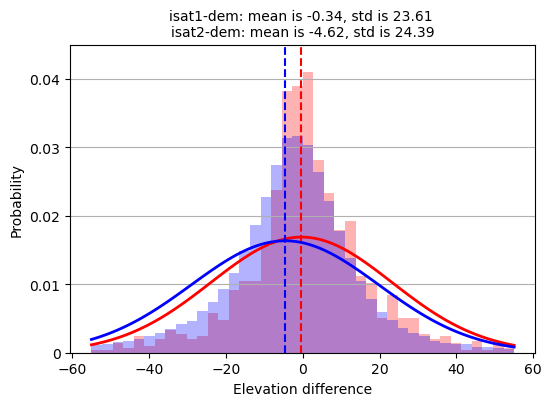

In [17]:
x_range = [-55, 55]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
### isat1
ax.hist(isat1_dem['dif_alt_dem'][ids_isat1_stable], bins=40, range=x_range, \
                        alpha=0.3, rwidth=0.85, density=True, color='red', histtype='stepfilled')
mu_isat1, std_isat1 = norm.fit(isat1_dem['dif_alt_dem'][ids_isat1_stable])
x = np.linspace(x_range[0], x_range[1], 100); 
p = norm.pdf(x, mu_isat1, std_isat1)
ax.plot(x, p, 'red', linewidth=2)
ax.vlines(x=mu_isat1, ymin=0, ymax=0.05, colors='red', linestyles='dashed')

### isat2
ax.hist(isat2_dem['dif_alt_dem'][ids_isat2_stable], bins=40, range=x_range, \
                   alpha=0.3, rwidth=0.85, density=True, color='blue', histtype='stepfilled')
mu_isat2, std_isat2 = norm.fit(isat2_dem['dif_alt_dem'][ids_isat2_stable]) 
x = np.linspace(x_range[0], x_range[1], 100)
p = norm.pdf(x, mu_isat2, std_isat2)
ax.plot(x, p, 'blue', linewidth=2)
ax.vlines(x=mu_isat2, ymin=0, ymax=0.05, colors='blue', linestyles='dashed')
ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04], ['0', '0.01', '0.02', '0.03', '0.04'])
ax.grid(axis='y')
ax.set_ylim(0,0.045)
ax.set_ylabel('Probability')
ax.set_xlabel('Elevation difference')
ax.set_title('isat1-dem: mean is %.2f, std is %.2f \nisat2-dem: mean is %.2f, std is %.2f' \
             % (mu_isat1, std_isat1, mu_isat2, std_isat2), fontsize = 10)




### 1.3 glacier region (h-dem) -> isat1, isat2, cryosat-2.


In [8]:
## glacier region
ids_isat1_gla = np.where(isat1_dem['type_fp']==2)[0]
ids_isat2_gla = np.where(isat2_dem['type_fp']==2)[0]
ids_cryo2_gla = np.where(cryo2_dem['type_fp']==2)[0]
print(len(ids_isat1_gla), len(ids_isat2_gla), len(ids_cryo2_gla))



161 34992 27293


Text(0.5, 1.0, 'isat1-dem: mean is -3.72, std is 30.15 \nisat2-dem: mean is -7.36, std is 26.63 \ncryo2-dem: mean is -4.75, std is 33.15')

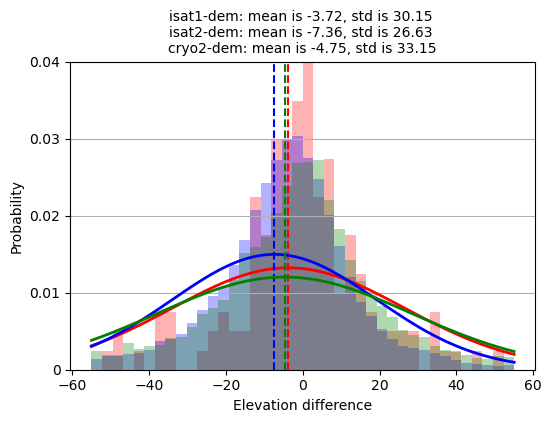

In [18]:
x_range = [-55, 55]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
## isat1
ax.hist(isat1_dem['dif_alt_dem'][ids_isat1_gla], bins=40, range=x_range, \
                                alpha=0.3, rwidth=0.85, density=True, color='red', histtype='stepfilled')
mu_isat1, std_isat1 = norm.fit(isat1_dem['dif_alt_dem'][ids_isat1_gla])
x = np.linspace(x_range[0], x_range[1], 100); 
p = norm.pdf(x, mu_isat1, std_isat1)
ax.plot(x, p, 'red', linewidth=2)
ax.vlines(x=mu_isat1, ymin=0, ymax=0.05, colors='red', linestyles='dashed')
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_ylim(0,0.04)

## isat2
ax.hist(isat2_dem['dif_alt_dem'][ids_isat2_gla], bins=40, range=x_range, \
                                alpha=0.3, rwidth=0.85, density=True, color='blue', histtype='stepfilled')
mu_isat2, std_isat2 = norm.fit(isat2_dem['dif_alt_dem'][ids_isat2_gla]) 
x = np.linspace(x_range[0], x_range[1], 100); 
p = norm.pdf(x, mu_isat2, std_isat2)
ax.plot(x, p, 'blue', linewidth=2)
ax.vlines(x=mu_isat2, ymin=0, ymax=0.05, colors='blue', linestyles='dashed')
ax.grid(axis='y')
ax.set_ylim(0,0.04)

## cryo2
ax.hist(cryo2_dem['dif_alt_dem'][ids_cryo2_gla], bins=40, range=x_range, \
                                alpha=0.3, rwidth=0.85, density=True, color='green', histtype='stepfilled')
mu_cryo2, std_cryo2 = norm.fit(cryo2_dem['dif_alt_dem'][ids_cryo2_gla]) 
x = np.linspace(x_range[0], x_range[1], 100); 
p = norm.pdf(x, mu_cryo2, std_cryo2)
ax.plot(x, p, 'green', linewidth=2)
ax.vlines(x=mu_cryo2, ymin=0, ymax=0.05, colors='green', linestyles='dashed')
ax.grid(axis='y')
ax.set_ylim(0, 0.03)
ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04], ['0', '0.01', '0.02', '0.03', '0.04'])
ax.set_xlabel('Elevation difference')
ax.set_title('isat1-dem: mean is %.2f, std is %.2f \nisat2-dem: mean is %.2f, std is %.2f \ncryo2-dem: mean is %.2f, std is %.2f' \
                      % (mu_isat1, std_isat1, mu_isat2, std_isat2, mu_cryo2, std_cryo2), fontsize = 10)



### **2. icesat-2 strong vs. icesat-2 weak for the stable region**

In [11]:
ids_isat2_strong = np.where((isat2_dem['beam_type']==1) & (isat2_dem['type_fp']==1))[0]  ### stong and stable region
ids_isat2_weak = np.where((isat2_dem['beam_type']==0) & (isat2_dem['type_fp']==1))[0]
print(len(ids_isat2_strong), len(ids_isat2_weak))


108318 78793


Text(0.5, 1.0, 'strong beam: mean is -4.37, std is 24.41 \n weak beam: mean is -4.96, std is 24.37')

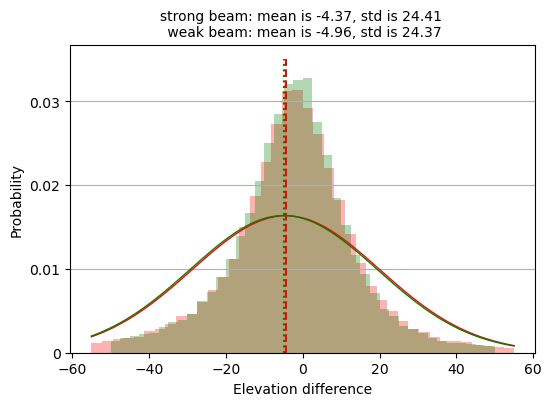

In [24]:
x_range = [-55, 55]
fig, ax = plt.subplots(1,1,figsize=(6,4))

## strong beam
a = ax.hist(isat2_dem['dif_alt_dem'][ids_isat2_strong], bins=40, range=x_range, \
                        alpha=0.3, rwidth=0.85, density=True, color='red', histtype='stepfilled')
mu_strong, std_strong = norm.fit(isat2_dem['dif_alt_dem'][ids_isat2_strong]) 
x_strong = np.linspace(x_range[0], x_range[1], 100)
p_strong = norm.pdf(x_strong, mu_strong, std_strong)
ax.plot(x_strong, p_strong, 'red', linewidth=1)
ax.vlines(x=mu_strong, ymin=0, ymax=0.035, colors='red', linestyles='dashed')

## weak beam
b_weak = ax.hist(isat2_dem['dif_alt_dem'][ids_isat2_weak], bins=40, range=[-50,50], \
                   alpha=0.3, rwidth=0.85, density=True, color='green', histtype='stepfilled')
mu_weak, std_weak = norm.fit(isat2_dem['dif_alt_dem'][ids_isat2_weak])
x_weak = np.linspace(x_range[0], x_range[1], 100); 
p_weak = norm.pdf(x_weak, mu_weak, std_weak)
ax.plot(x_weak, p_weak, 'green', linewidth=1)
ax.vlines(x=mu_weak, ymin=0, ymax=0.035, colors='green', linestyles='dotted')
ax.grid(axis='y')
ticks = ax.set_yticks([0, 0.01, 0.02, 0.03], ['0', '0.01', '0.02', '0.03'])
ax.set_ylabel('Probability')
ax.set_xlabel('Elevation difference')
ax.set_title('strong beam: mean is %.2f, std is %.2f \n weak beam: mean is %.2f, std is %.2f' \
                                        % (mu_strong, std_strong, mu_weak, std_weak), fontsize = 10)



### **2. cryosat-2 swath vs. cryosat-2 l2: the glacier region**


In [13]:
ids_cryo2_gla = np.where(cryo2_dem['type_fp']==2)[0]
ids_cryo2_swath_gla = np.where((cryo2_dem['is_swath']==1) & (cryo2_dem['type_fp']==2))[0]
ids_cryo2_l2_gla = np.where((cryo2_dem['is_swath']==0) & (cryo2_dem['type_fp']==2))[0]
print(len(ids_cryo2_gla), len(ids_cryo2_swath_gla), len(ids_cryo2_l2_gla))



27293 25533 1760


Text(0.5, 1.0, 'cryo2-dem(l2): mean is -14.82, std is 41.76 \n cryo2-dem(swath): mean is -4.06, std is 32.36')

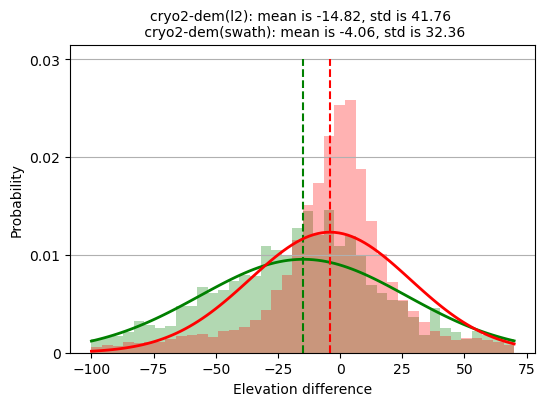

In [27]:
# x_range_swath = [-55, 55]
x_range = [-100, 70]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
### cryo2-dem (l2 data) on the glaicer region
b = ax.hist(cryo2_dem['dif_alt_dem'][ids_cryo2_l2_gla], bins=40, range=x_range, \
                     alpha=0.3, rwidth=0.85, density=True, color='green', histtype='stepfilled')
mu_l2, std_l2 = norm.fit(cryo2_dem['dif_alt_dem'][ids_cryo2_l2_gla]) 
x = np.linspace(x_range[0], x_range[1], 100); 
p = norm.pdf(x, mu_l2, std_l2)
ax.vlines(x=mu_l2, ymin=0, ymax=0.03, colors='green', linestyles='dashed')
ax.plot(x, p, 'green', linewidth=2)

### cryo2-dem (swath data) on the glaicer region
b = ax.hist(cryo2_dem['dif_alt_dem'][ids_cryo2_swath_gla], bins=40, range=x_range, \
                     alpha=0.3, rwidth=0.85, density=True, color='red', histtype='stepfilled')
mu_swath, std_swath = norm.fit(cryo2_dem['dif_alt_dem'][ids_cryo2_swath_gla]) 
x = np.linspace(x_range[0], x_range[1], 100); 
p = norm.pdf(x, mu_swath, std_swath)
ax.plot(x, p, 'red', linewidth=2)
ax.vlines(x=mu_swath, ymin=0, ymax=0.03, colors='red', linestyles='dashed')
ax.grid(axis='y')
ticks = ax.set_yticks([0, 0.01, 0.02, 0.03], ['0', '0.01', '0.02', '0.03'])
ax.set_xlabel('Elevation difference')
ax.set_ylabel('Probability')
ax.set_title('cryo2-dem(l2): mean is %.2f, std is %.2f \n cryo2-dem(swath): mean is %.2f, std is %.2f' \
                                                % (mu_l2, std_l2, mu_swath, std_swath), fontsize = 10)

